# HW 1 and Concepts Review

- Ways to Optimize Logistic Regression --> L1 and L2 regularization (placing limits on the data)

- Linear/Logistic Regression - control this by using the activation function in the network

- Single layer NN --> only need to add one MLP layer, and specify the dim of the input using input_dim = x.shape[1]

- can also pass in validation data on training step

- Remember:

    - Regression: - (Boston Housing)
        - 1 output neuron
        - loss is mse
        - activiation can be linear or relu
        
    - Binary classificiation (Pima Indians Diabetes)
        - 1 output neuron
        - loss is binary cross entropy
        - activation = sigmoid
        
 - Remember 
     optimizers:
     - sgd
     - rmsprop
     
     all the Dense layers represent is a collection of perceptrons - each of these always has an activation function:
         - inputs * weights
         - summation and then add bias
         - then pass to activation function
         - and pass the output on to the next layer
         
 - when we do TL, the params are non trainable
 - Question: can we go over how to calculate the number of total params?
 
 
 - the kind of model that the NN represents is an amalgam of the activation functions being used (to form the decision boundary)!
 
 
- dimensiosn of an image processed by a Conv layer != the dim of the input image. Depends on:
    - input dim
    - kernel dim
    - and stride length

# Activities

Instructions from Milad:

Create a NN model in Keras with following specifications:

1. Two hidden layers with your choice of neurons at each layer

2. Train your model and plot the prediction versus true values in a graph

In [4]:
import keras
from keras.layers import Dense
from keras.models import Sequential
# Set random seed
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
# Create random dataset of m training x values between -5 and 5
m = 100
x_train = np.random.rand(m)*10 - 5
# Create evenly spaced test x values (for plotting)
x_test  = np.linspace(-5, 5, 100)

def f(x):
    return 0.1*(x + x**2 + 10*x + 0.5*x**2 - 0.5*x**3)*x

y_train = f(x_train) + np.random.randn(m)   # polynomial plus noise
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [32]:
model = Sequential()

model.add(Dense(100, input_shape=(1,), activation='relu'))  # if we use input_dim, then u can use x.shape(1)
model.add(Dense(50, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='rmsprop', loss='mse', metrics=["accuracy"])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_15 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 51        
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=0)

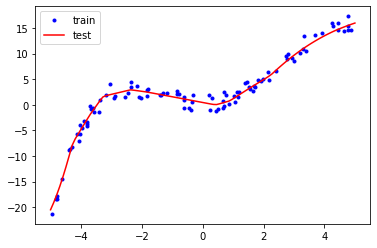

In [39]:
 # accuracy plot
    
y_pred = model.predict(x_test)
plt.plot(x_train, y_train, 'b.')  # 'b. makes a 'blue scatter plot'
plt.plot(x_test, y_pred, 'r')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
# Obtaining the weights and biases of a trained NN model in Keras
# credit to this link: B_Input_Hidden = model.layers[0].get_weights()[1]
def get_weights_and_biases(model, layer_num):
    return model.layers[layer_num].get_weights()

In [46]:
print('first layer weights and biases')
weights, biases = get_weights_and_biases(model, 0)
print(weights)
print(biases)

first layer weights and biases
[[ 2.15883434e-01 -1.10729545e-01  1.64377078e-01  1.92367405e-01
   1.40370578e-01 -9.94098783e-02  6.54776096e-02 -1.55782610e-01
  -1.05598100e-01 -5.93706630e-02  4.61637229e-02 -1.40643060e-01
  -6.25400469e-02  5.00646606e-02  5.39569855e-02 -5.95640764e-02
  -1.88870206e-01 -4.58976217e-02  4.38118763e-02  4.57983874e-02
   1.14502795e-01 -9.07479078e-02 -1.40568286e-01 -9.80086550e-02
  -7.08043501e-02 -5.98119609e-02  5.33110276e-02  2.94481460e-02
   1.66552186e-01  1.63259581e-01 -1.80108666e-01  9.01984274e-02
   6.30561337e-02 -1.01620220e-01  1.27600670e-01 -7.15084970e-02
   1.63931966e-01  5.80667928e-02 -5.30175753e-02  2.14945868e-01
   8.07076395e-02 -1.05938278e-01  2.59318165e-02 -1.39749497e-01
  -6.31862804e-02  2.12140590e-01  1.87929973e-01  1.88655918e-04
  -1.24998041e-03 -4.81172241e-02  7.96355456e-02 -2.41209492e-01
   1.53960735e-01  6.66606724e-02  5.24799228e-02  7.68097416e-02
  -8.88162628e-02  1.81781256e-03 -7.30462074

These values are adjusted during backpropagation, which occurs during the iterations of the epochs during training!

Top 3 Use Cases for Data Scientists:

1. Text
2. Images
3. Audio

# Intro to Final Project

- remember to judge the model on BOTH accuracy and loss, since the classes are imbalanced
- use glob for making the huge DF